# Linear Regression
____

#### Libraries
____

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import statsmodels.formula.api as sm


%matplotlib inline

#### Load dataset
___

In [145]:
dataset = '../../data/commercial_data_clear.csv'
columns = ['ptype', 'floor_area', 'build_year', 'occupy', 'star', 'site_eui', 'ngas', 'water_use']

building = pd.read_csv(dataset, sep=',', usecols=columns)

building.head(5)

ptype  floor_area  build_year  occupy  \
0                    Multifamily Housing    412503.0        1903     100   
1  Hospital (General Medical & Surgical)    567517.0        1950     100   
2                    Multifamily Housing    321464.0        1939     100   
3                    Multifamily Housing     54913.0        1911     100   
4                    Multifamily Housing    175885.0        1973     100   

    star  site_eui         ngas  water_use  
0   93.0      32.0    2047200.0    22061.0  
1   80.0     352.7  128486713.1     9574.0  
2   72.0      76.2     880200.0     5915.6  
3  100.0      17.9      59412.9      231.9  
4   40.0      56.2    3826349.7      237.9

In [39]:
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900 entries, 0 to 5899
Data columns (total 8 columns):
ptype         5900 non-null object
floor_area    5900 non-null float64
build_year    5900 non-null int64
occupy        5900 non-null int64
star          5900 non-null float64
site_eui      5900 non-null float64
ngas          5900 non-null float64
water_use     5900 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 368.8+ KB


In [40]:
building.describe()

floor_area   build_year       occupy         star       site_eui  \
count  5.900000e+03  5900.000000  5900.000000  5900.000000    5900.000000   
mean   1.350068e+05  1949.124407    99.251695    59.967288     270.639627   
std    1.743403e+05    30.360083     4.584281    29.114526   11458.715925   
min    8.000000e+03  1649.000000     0.000000     1.000000       0.000000   
25%    6.500000e+04  1927.000000   100.000000    38.000000      65.100000   
50%    8.612950e+04  1941.000000   100.000000    65.000000      79.300000   
75%    1.334128e+05  1965.000000   100.000000    84.000000      96.325000   
max    2.778517e+06  2019.000000   100.000000   100.000000  869265.000000   

               ngas     water_use  
count  5.900000e+03  5.900000e+03  
mean   1.429712e+07  1.500538e+04  
std    6.439126e+08  1.209834e+05  
min    0.000000e+00  0.000000e+00  
25%    1.305033e+06  2.846600e+03  
50%    4.168142e+06  4.893500e+03  
75%    6.627781e+06  8.002700e+03  
max    4.945919e+10  3.491538e+06

#### Data cleanup
___

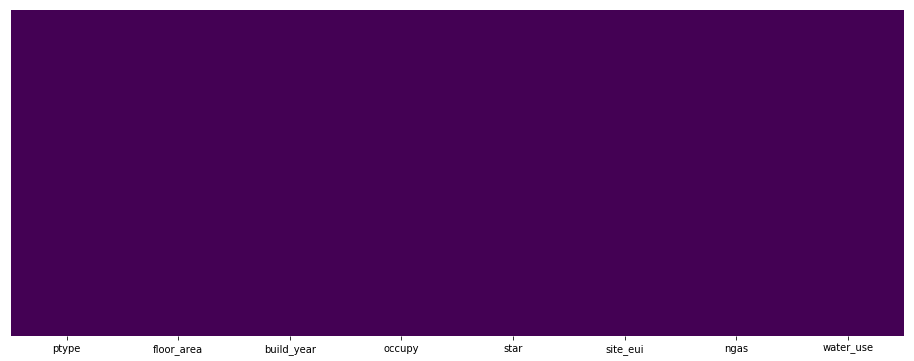

In [146]:
plt.figure(figsize=(16,6))

sns.heatmap(building.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [147]:
building.dropna(axis='columns', how='all', inplace=True)
building.dropna(inplace=True)
building.head()

ptype  floor_area  build_year  occupy  \
0                    Multifamily Housing    412503.0        1903     100   
1  Hospital (General Medical & Surgical)    567517.0        1950     100   
2                    Multifamily Housing    321464.0        1939     100   
3                    Multifamily Housing     54913.0        1911     100   
4                    Multifamily Housing    175885.0        1973     100   

    star  site_eui         ngas  water_use  
0   93.0      32.0    2047200.0    22061.0  
1   80.0     352.7  128486713.1     9574.0  
2   72.0      76.2     880200.0     5915.6  
3  100.0      17.9      59412.9      231.9  
4   40.0      56.2    3826349.7      237.9

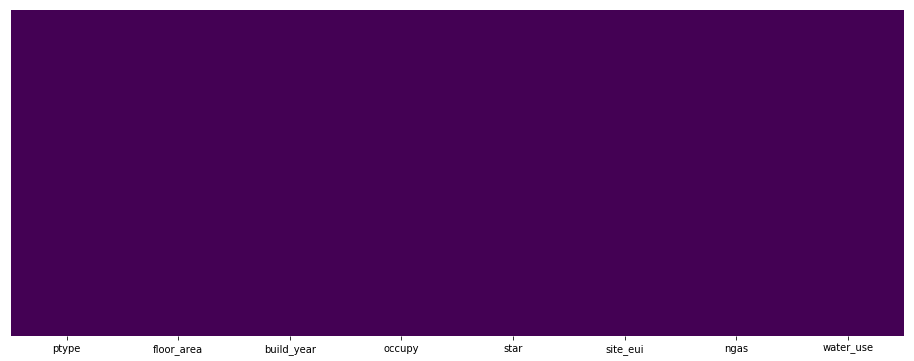

In [148]:
plt.figure(figsize=(16,6))

sns.heatmap(building.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

#### Correlations
___

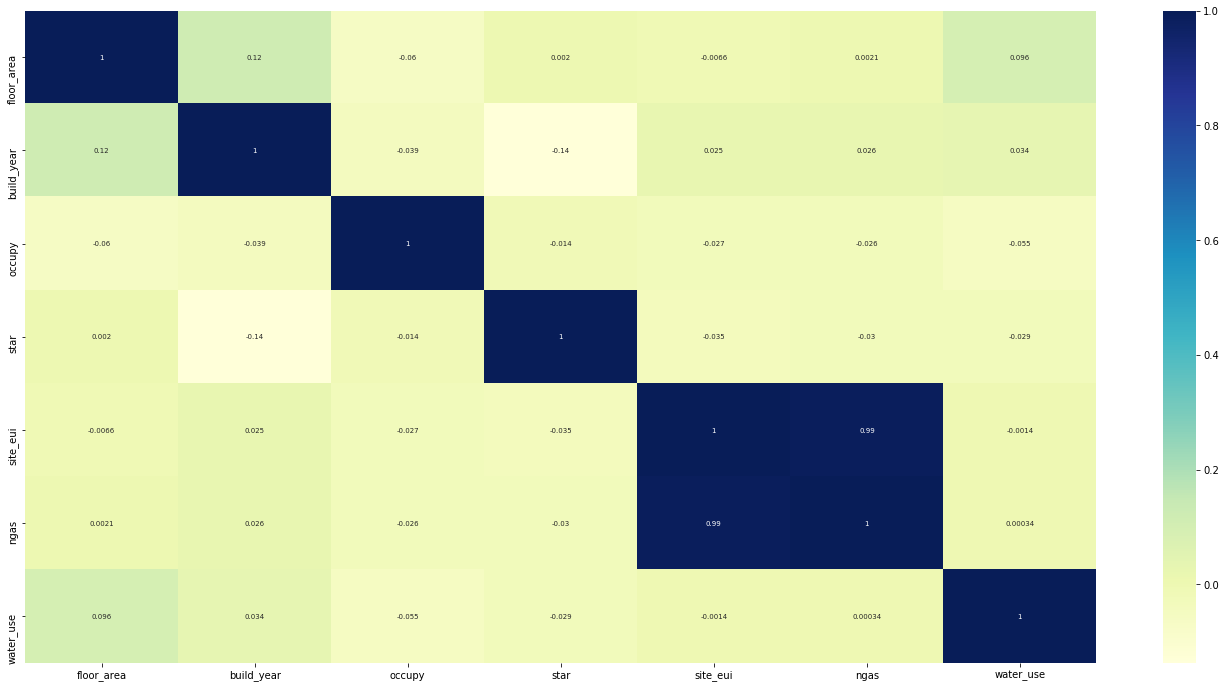

In [149]:
plt.figure(figsize=(24,12))

sns.heatmap(building.corr(), annot=True, annot_kws={"size": 7}, cmap='YlGnBu')
plt.show()

#### Distributions
___

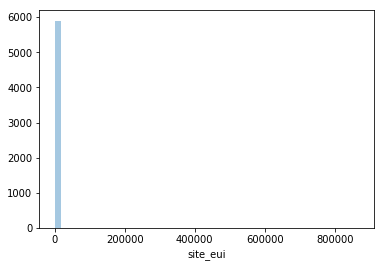

In [45]:
sns.distplot(building['site_eui'], kde=False, bins=50)

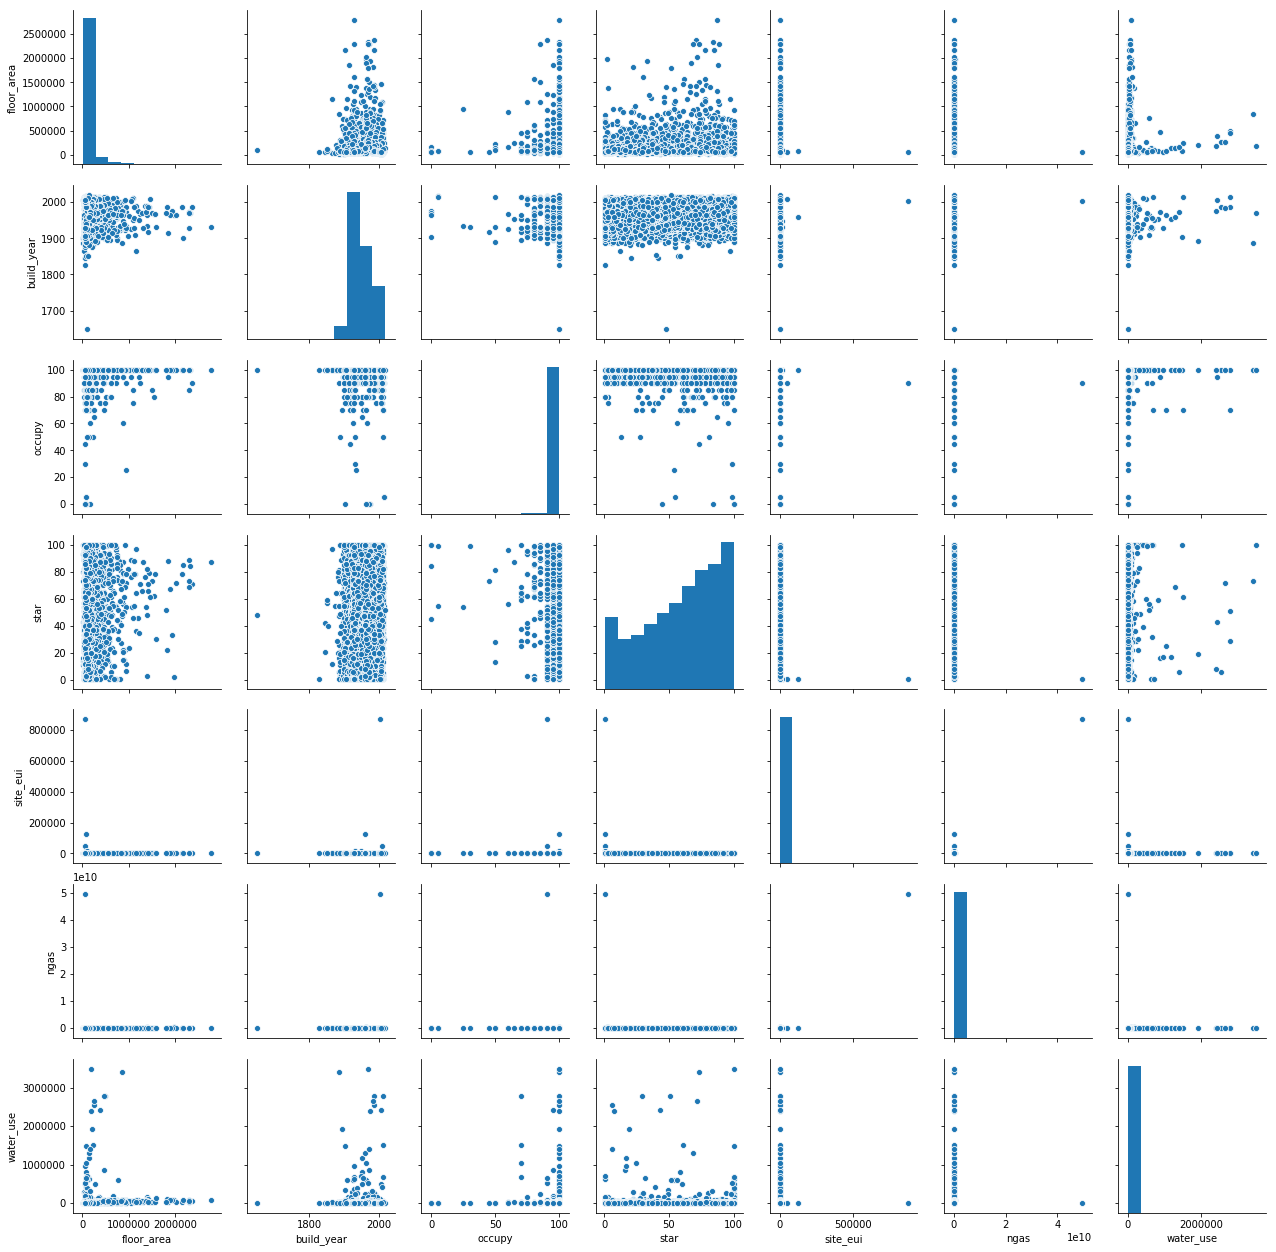

In [10]:
sns.pairplot(building, palette='coolwarm')

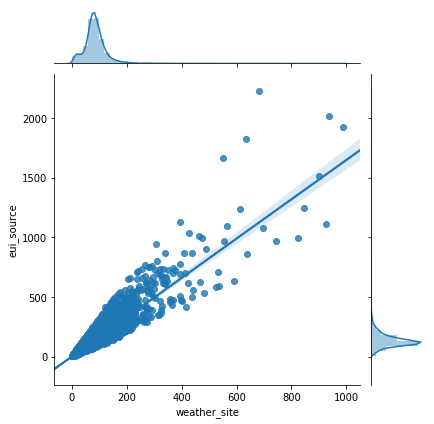

In [64]:
sns.jointplot(x='weather_site', y='eui_source', data=building, kind='reg')

#### Handle Dummy's
___

In [150]:
dummy = pd.get_dummies(building['ptype'])

building = pd.concat([building, dummy], axis=1)

df_X = building.copy(deep=True)
df_X.drop(['site_eui', 'ptype'],axis='columns', inplace=True)

df_Y = building['site_eui'].copy(deep=True)

In [131]:
#pd.get_dummies(building['ptype']).values[:,1:].shape

In [151]:
df_X.columns

Index(['floor_area', 'build_year', 'occupy', 'star', 'ngas', 'water_use',
       'College/University', 'Courthouse', 'Distribution Center',
       'Financial Office', 'Hospital (General Medical & Surgical)', 'Hotel',
       'K-12 School', 'Manufacturing/Industrial Plant', 'Medical Office',
       'Mixed Use Property', 'Multifamily Housing',
       'Non-Refrigerated Warehouse', 'Office', 'Refrigerated Warehouse',
       'Residence Hall/Dormitory', 'Retail Store', 'Self-Storage Facility',
       'Senior Care Community', 'Supermarket/Grocery Store',
       'Wholesale Club/Supercenter', 'Worship Facility'],
      dtype='object')

#### Define X, Y variables
___

In [152]:
#x_columns = ['ptype', 'floor_area', 'build_year', 'occupy', 'star', 'ngas', 'water_use']
#y_columns = ['site_eui']

#X = building[x_columns].values
#Y = building[y_columns].values

X = df_X.values
Y = df_Y.values

In [153]:
print (X.shape, Y.shape)

(5900, 27) (5900,)


In [134]:
print (X)

[[4.12503e+05 1.90300e+03 1.00000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [5.67517e+05 1.95000e+03 1.00000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [3.21464e+05 1.93900e+03 1.00000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [9.35000e+04 1.92600e+03 1.00000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [6.07150e+04 1.92800e+03 1.00000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [5.35370e+04 2.00600e+03 9.50000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]


#### Label Encoding
___

In [72]:
#building['ptype'].unique()

In [26]:
#building['ptype'].nunique()

21

In [73]:
#label_encoder_ptype = LabelEncoder()
#X[:, 0] = label_encoder_ptype.fit_transform(building['ptype'])


#label_hotencoder_ptype = OneHotEncoder(categorical_features = [0])
#X = label_hotencoder_ptype.fit_transform(X).toarray()

#print(X)

#np.unique(label_encoder_ptype.fit_transform(building['ptype']))
#label_hotencoder_ptype.fit_transform(X)


### Avoiding the Dummy Variable Trap
____


In [154]:
X.shape

(5900, 27)

In [155]:
#X = X[:, 1:]

X = X[:,:-1]

X.shape

(5900, 26)

#### Split dataset (TRAIN/TEST) data
____

In [156]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [157]:
regressor = LinearRegression() 
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Fitting Simple Linear Regression to the Training Set
_____

In [158]:
y_prediction = regressor.predict(X_test)

#### Real x Predict
_____

array([ -38.32353139,  131.50736389,  299.55735462, ...,  212.49608683,
       -261.73439859,  526.40218214])

In [163]:
pd.DataFrame({
    'Real' : Y_test,
    'Predict' : y_prediction

})

Real     Predict
0      44.8  -38.323531
1      83.6  131.507364
2     121.0  299.557355
3      72.5    2.264713
4     141.3  205.714657
5      90.2   43.066272
6      60.9  -45.847471
7      78.2   76.080661
8      66.8  -17.410700
9      71.3    0.821603
10     64.5   85.515295
11     30.7  -56.109343
12     93.4   79.462087
13     91.5  103.939001
14     26.4   35.738024
15    164.4  292.382955
16     75.3  115.116604
17    102.6  705.081996
18     63.8  -50.914153
19     61.2  -54.112736
20    141.2  206.861419
21     76.9   55.890235
22     55.5  -97.041299
23     86.3   80.231700
24     26.3 -103.109495
25     25.1 -215.647131
26     67.5   10.530919
27    153.7  320.881516
28     75.2   50.469091
29    101.0  216.791662
...     ...         ...
1740   62.8  140.276079
1741   59.9 -112.415782
1742   56.8   28.255237
1743   76.8   33.663213
1744   80.4  101.115895
1745   72.6   30.398627
1746   46.4 -195.994066
1747   77.3   91.390218
1748   48.9   86.597881
1749  133.3  290.055265
1750   30.7  204.706501
1751  121.9   -3.555708
1752   41.7  -45.856457
1753   78.2   89.789939
1754   93.7   15.266282
1755   19.6 -129.376375
1756   60.0  -51.109204
1757   38.0    1.924721
1758   72.5    5.624171
1759   88.5  228.738423
1760   22.8 -133.228386
1761   68.5  -22.235877
1762   63.9  -42.980458
1763   93.0  122.101002
1764  121.9  290.137384
1765  142.7  319.592935
1766   65.0  -18.780012
1767   88.6  212.496087
1768   21.5 -261.734399
1769  179.4  526.402182

[1770 rows x 2 columns]

#### Model Score
__________

In [164]:
print(f"Training Data Score: {regressor.score(X_train, Y_train)}")
print(f"Testing Data Score: {regressor.score(X_test, Y_test)}")

Training Data Score: 0.9763246622866844
Testing Data Score: -0.39802066105374667


### Backward Elimination
___

In [96]:
X = np.append(arr = np.ones((len(X), 1)).astype(int), values = X, axis =1)

In [ ]:
X_optimized = X[:, [0, 1, 2, 3, 4, 5]]

significante_level = 0.05

regressor_OLS = sm.OLS(endog = Y, exog = X_optimized).fit()